In [1]:

import zipfile


In [2]:
# Extraction des données depuis bank.zip
with zipfile.ZipFile("bank.zip") as zip_ref:
    zip_ref.extractall()




In [3]:
import pandas as pd
# On charge le dataset depuis le fichier CSV
df = pd.read_csv("bank-full.csv", sep=";")

# Vérifier la taille du dataset (nombre de lignes et colonnes)
df.shape

# Vérifier les types des variables
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
# Vérifier s’il y a des valeurs manquantes
df.isnull().sum()  

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
# Vérifier s’il y a des doublons
df.duplicated().sum()


np.int64(0)

In [7]:
# Supprimer les doublons par précaution
df = df.drop_duplicates()


In [8]:
# Détection des outliers avec la méthode IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Filtrer les âges aberrants
df = df[(df['age'] >= Q1 - 1.5*IQR) & (df['age'] <= Q3 + 1.5*IQR)]

In [9]:
# Renommer certaines colonnes pour plus de clarté
df = df.rename(columns={
    "y": "deposit_subscription",
    "balance": "account_balance",
    "duration": "call_duration"
})


In [10]:
# Transformer la variable cible en numérique (1 = oui, 0 = non)
df["deposit_subscription"] = df["deposit_subscription"].map({"yes": 1, "no": 0})


In [11]:
# Créer une nouvelle variable pour regrouper les âges en tranches
df["age_group"] = pd.cut(df["age"], bins=[18,30,50,100], labels=["18-30","31-50","51+"])


In [12]:
# Transformer les variables qualitatives en numériques avec get_dummies
df_encoded = pd.get_dummies(df, columns=[
    "job", "marital", "education", "housing", "loan", "contact", "poutcome"
], drop_first=True)


In [13]:
# Garder uniquement les colonnes pertinentes pour l’analyse
selected_cols = ["age","age_group","account_balance","call_duration","campaign","pdays","previous","deposit_subscription"]
df_final = df_encoded[selected_cols]


In [14]:
df

,age,job,marital,education,default,account_balance,housing,loan,contact,day,month,call_duration,campaign,pdays,previous,poutcome,deposit_subscription,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,51+
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,31-50
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,31-50
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,31-50
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,31-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,1,18-30
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,1,18-30
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,51+
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0,51+


In [15]:
# Sauvegarder le dataset propre dans un nouveau fichier CSV
df_final.to_csv("bank_full_clean.csv", index=False)

In [16]:
# Obtenir les statistiques descriptives des variables numériques
df_final.describe()


,age,account_balance,call_duration,campaign,pdays,previous,deposit_subscription
count,44724.000000,44724.000000,44724.000000,44724.000000,44724.000000,44724.000000,44724.000000
mean,40.545524,1345.344491,257.369846,2.770682,40.000000,0.573428,0.113384
std,9.978232,2983.219087,257.428953,3.108579,100.193608,2.300735,0.317066
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,71.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,442.000000,179.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1408.000000,318.000000,3.000000,-1.000000,0.000000,0.000000
max,70.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


<Axes: title={'center': "Répartition par tranche d'âge"}, xlabel='age_group'>

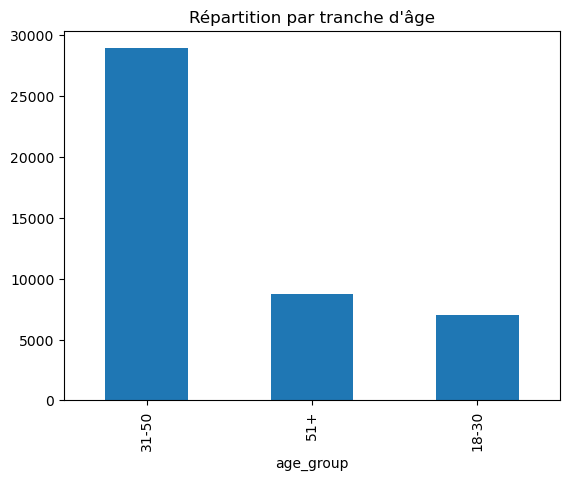

In [17]:
# Afficher la répartition des clients par tranche d’âge
df_final["age_group"].value_counts().plot(kind="bar", title="Répartition par tranche d'âge")


<Axes: title={'center': "Solde moyen par tranche d'âge"}, xlabel='age_group'>

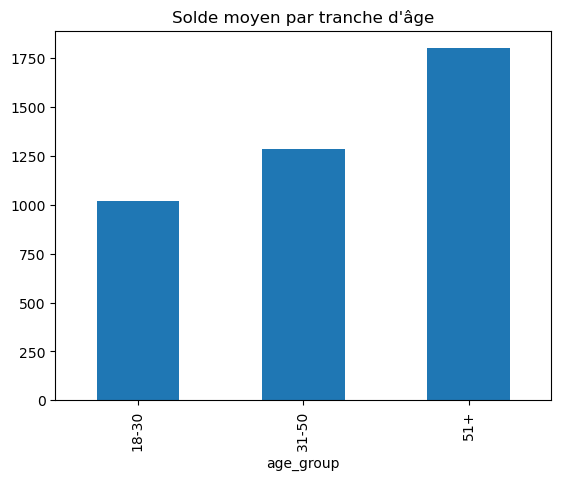

In [18]:
# Calculer et afficher le solde moyen par tranche d’âge
df_final.groupby("age_group", observed=True)["account_balance"].mean().plot(kind="bar", title="Solde moyen par tranche d'âge")



<Axes: xlabel='deposit_subscription', ylabel='campaign'>

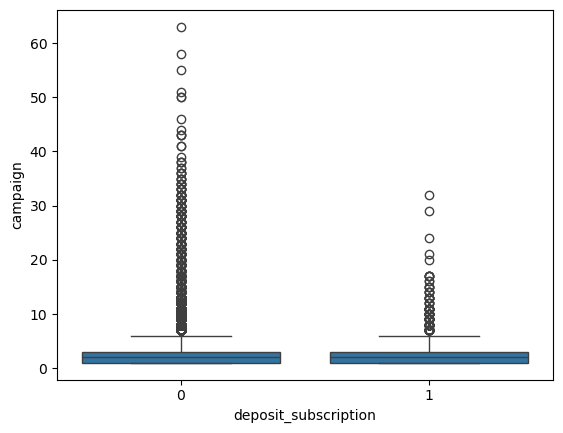

In [19]:
import seaborn as sns

# Comparer le nombre de contacts selon la souscription
sns.boxplot(x="deposit_subscription", y="campaign", data=df_final)

